In [2]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict

In [9]:
## build state for batsmanWorkflow

class BatsmanState(TypedDict):
  runs: int 
  balls:int 
  fours: int 
  sixes: int 

  sr: float
  boundary_percent: float 
  balls_per_boundary:float
  summary: str

In [18]:
## build a fn for Sr(Strike Rate) calculation for Sr node

def strike_rate(state:BatsmanState):
  sr= (state['runs']/state['balls'])*100

  # state['sr']= sr
  # return state 

  return {'sr':sr} 



# build a fn for boundary_percent node
def boundary_percent(state:BatsmanState)->BatsmanState:
  bp= ((state['fours']*4+ state['sixes']*6)/state['runs'])*100

  # state['boundary_percent']= bp 
  # return state 

  return {'boundary_percent':bp}



# build a fn for balls_per_boundary node
def balls_per_boundary(state: BatsmanState)->BatsmanState:
  bpb= state['balls']/(state['fours']+state['sixes'])

  # state['balls_per_boundary']= bpb 
  # return state
  return {"balls_per_boundary": bpb}



## build a summary fn for summary node
def summary(state:BatsmanState):
  s= f"Strike Rate -> {state['sr']} \n Boundary percent -> {state['boundary_percent']} \n balls per boundary -> {state['balls_per_boundary']}"

  # state['summary']= s
  # return state

  return {'summary':summary}

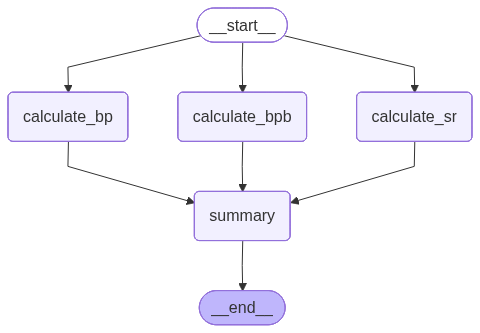

In [19]:
## build a graph
graph= StateGraph(BatsmanState)

## add nodes
graph.add_node('calculate_sr', strike_rate)
graph.add_node('calculate_bp', boundary_percent)
graph.add_node('calculate_bpb', balls_per_boundary)
graph.add_node('summary', summary)

## add edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bp')
graph.add_edge(START, 'calculate_bpb')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bp', 'summary')
graph.add_edge('calculate_bpb', 'summary')

graph.add_edge('summary', END)

## compile
workflow= graph.compile()
workflow


In [20]:
intial_state= {'runs':50, 'balls':20, 'fours':4, 'sixes':3}

final_state= workflow.invoke(intial_state)

## after invoking you workflow you often get an error like -> InvalidUpdateError
## what we have mistaked it that our eact calculative node returing **state** after calculation
## each things in state are returned three time;; what problem with parallel workflow is that after parallel node execuation you have done any thing with an attribute of typedDict
## and when langgraph recived a state from diff node at time it assume that something have been changed in every attribute however there are not any chnaged in any step but it assume it first so after that it confused
## so this thing is conflict that which state value should  take

## solution is that you should not send whole output(state) from each calculation node 
## instead you should only send those attribute which have been changed (calculated)

## basically we will send partial state not whole


final_state

{'runs': 50,
 'balls': 20,
 'fours': 4,
 'sixes': 3,
 'sr': 250.0,
 'boundary_percent': 68.0,
 'balls_per_boundary': 2.857142857142857,
 'summary': <function __main__.summary(state: __main__.BatsmanState)>}

In [17]:
final_state['summary']

'Strike Rate -> 250.0 \n Boundary percent -> 68.0 \n balls per boundary -> 2.857142857142857'